<h1 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">Asteroid Diameter Prediction</h1>

<a id='table_of_contents'></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">Table of Contents</h2>

1. <a href="#download" style="text-decoration: None">Download Data</a>
2. <a href="#import" style="text-decoration: None">Import Libraries and Dataset</a>
3. <a href="#data_preview" style="text-decoration: None">Dataset Preview</a>
4. <a href="#data_wrangling" style="text-decoration: None">Data Wrangling</a>    
5. <a href="#eda" style="text-decoration: None">Exploratory Data Analysis</a>
    - <a href="#univariate" style="text-decoration: None">Univariate Analysis</a>
    - <a href="#bivariate" style="text-decoration: None">Bivariate Analysis</a>
6. <a href="#data_preprocessing" style="text-decoration: None">Data Preparation and Preprocessing</a>
7. <a href="#baseline" style="text-decoration: None">Baseline Models</a>
8. <a href="#optimization" style="text-decoration: None">Optimization: Hyperparameter Tuning</a>
9. <a href="#performance_summary" style="text-decoration: None">Performance Comparison and Summary</a>
10. <a href="#save_model" style="text-decoration: None">Save Model</a>

<a id="download"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">1. Download Data</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

I have downloaded the dataset directly within the Jupyter notebook using Jovian's opendatasets library. The dataset description can be found [here](https://www.kaggle.com/datasets/basu369victor/prediction-of-asteroid-diameter).

<strong>Note: Uncomment the following code cells if you are working outside of Kaggle environment.</strong>

In [1]:
# !pip install opendatasets

In [2]:
# import os 
# import opendatasets as od

In [3]:
# od.download('https://www.kaggle.com/datasets/basu369victor/prediction-of-asteroid-diameter')

In [4]:
# os.listdir('prediction-of-asteroid-diameter')

<a id="import"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">2. Import Libraries and Dataset</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [5]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

import warnings 
warnings.filterwarnings("ignore")

In [6]:
# Uncomment the line below if you are working outside of Kaggle
# raw_df = pd.read_csv('prediction-of-asteroid-diameter/Asteroid.csv')

# Comment the following lines of code if you are working outside of Kaggle
try:
    raw_df = pd.read_csv('../input/prediction-of-asteroid-diameter/Asteroid.csv')
except:
    raw_df = pd.read_csv('Asteroid.csv')

<a id="data_preview"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3. Dataset Preview</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [7]:
raw_df.head(10)

,full_name,a,e,G,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
0,1 Ceres,2.769165,0.076009,0.12,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,939.4,964.4 x 964.2 x 891.8,0.0900,9.074170,62.6284,0.713,0.426,NaN,C,G,N,N,1.594780
1,2 Pallas,2.772466,0.230337,0.11,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,545,582x556x500,0.1010,7.813200,14.3000,0.635,0.284,NaN,B,B,N,N,1.233240
2,3 Juno,2.669150,0.256942,0.32,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,246.596,NaN,0.2140,7.210000,NaN,0.824,0.433,NaN,Sk,S,N,N,1.034540
3,4 Vesta,2.361418,0.088721,0.32,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,525.4,572.6 x 557.2 x 446.4,0.4228,5.342128,17.8000,0.782,0.492,NaN,V,V,N,N,1.139480
4,5 Astraea,2.574249,0.191095,NaN,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0,2861,6.85,106.699,NaN,0.2740,16.806000,NaN,0.826,0.411,NaN,S,S,N,N,1.095890
5,6 Hebe,2.425160,0.203007,0.24,14.737901,138.640203,239.807490,1.932835,2.917485,3.776755,62329.0,0,6034,5.71,185.18,NaN,0.2679,7.274500,NaN,0.822,0.399,NaN,S,S,N,N,0.973965
6,7 Iris,2.385334,0.231206,NaN,5.523651,259.563231,145.265106,1.833831,2.936837,3.684105,62452.0,0,5206,5.51,199.83,NaN,0.2766,7.139000,NaN,0.855,0.484,NaN,S,S,N,N,0.846100
7,8 Flora,2.201764,0.156499,0.28,5.886955,110.889330,285.287462,1.857190,2.546339,3.267115,62655.0,0,2744,6.49,147.491,NaN,0.2260,12.865000,NaN,0.885,0.489,NaN,NaN,S,N,N,0.874176
8,9 Metis,2.385637,0.123114,0.17,5.576816,68.908577,6.417369,2.091931,2.679342,3.684806,61821.0,0,2649,6.28,190,NaN,0.1180,5.079000,NaN,0.858,0.496,NaN,NaN,S,N,N,1.106910
9,10 Hygiea,3.141539,0.112461,NaN,3.831560,283.202167,312.315206,2.788240,3.494839,5.568291,62175.0,0,3409,5.43,407.12,NaN,0.0717,27.630000,7.0000,0.696,0.351,NaN,C,C,N,N,1.778390


In [8]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
a,839734.0,2.843217,37.327031,-3.258894e+04,2.385244,2.644219,2.996035,3043.149073
e,839736.0,0.155633,0.093888,0.000000e+00,0.091453,0.143654,0.199400,1.201134
G,119.0,0.178739,0.134603,-2.500000e-01,0.100000,0.190000,0.250000,0.600000
i,839736.0,8.950009,6.666273,7.545953e-03,4.069043,7.257311,12.256026,175.188725
om,839736.0,168.501641,103.096571,3.882104e-04,80.212344,160.296065,252.206645,359.999800
w,839736.0,181.076593,104.024110,1.665763e-03,91.039551,181.669812,271.523344,359.999833
q,839736.0,2.404732,2.233138,7.051073e-02,1.971939,2.225494,2.578162,80.424175
ad,839730.0,3.385707,12.746419,7.736836e-01,2.775342,3.037745,3.357958,6081.841956
per_y,839735.0,6.859544,252.172503,0.000000e+00,3.683896,4.299860,5.185951,167877.712688
data_arc,823947.0,5660.187025,4192.420393,0.000000e+00,3599.000000,5792.000000,7228.000000,72684.000000


### Column Description


While I have familiarized myself with the data description, it's worth noting that the column names may not immediately convey their meanings to anyone reading the notebook for the first time. To enhance clarity and facilitate a deeper understanding of the dataset, concise and informative summaries have been included for each column. This addition aims to provide a clearer overview of the dataset, ensuring that anyone can grasp the context and insights more readily.

<table>
  <tr>
    <th>Column Name</th>
    <th>Kaggle Description</th>
    <th>Additional Description</th>
  </tr>
  <tr>
    <td>full_name</td>
    <td>Object's full name/designation</td>
    <td>Contains the complete designation or name of celestial objects in the dataset, serving as a unique identifier.</td>
  </tr>
  <tr>
    <td>a</td>
    <td>Semi-major axis (au)</td>
    <td>Represents the size of the object's orbit around the Sun in astronomical units (au).</td>
  </tr>
  <tr>
    <td>e</td>
    <td>Eccentricity</td>
    <td>Indicates how elliptical or circular the object's orbit is, with values close to 1 indicating high eccentricity.</td>
  </tr>
  <tr>
    <td>G</td>
    <td>Magnitude slope parameter</td>
    <td>Used in calculating the object's brightness; reflects its reflectivity.</td>
  </tr>
  <tr>
    <td>i</td>
    <td>Inclination (deg)</td>
    <td>Angle describing the tilt of the object's orbit relative to the solar system's plane.</td>
  </tr>
  <tr>
    <td>om</td>
    <td>Longitude of the ascending node</td>
    <td>Specifies the position of the object's orbital ascending node.</td>
  </tr>
  <tr>
    <td>w</td>
    <td>Argument of perihelion</td>
    <td>Defines the angle between perihelion and the ascending node.</td>
  </tr>
  <tr>
    <td>q</td>
    <td>Perihelion distance (au)</td>
    <td>Closest distance between the object and the Sun during its orbit, measured in astronomical units.</td>
  </tr>
  <tr>
    <td>ad</td>
    <td>Aphelion distance (au)</td>
    <td>Farthest distance between the object and the Sun during its orbit, measured in astronomical units.</td>
  </tr>
  <tr>
    <td>per_y</td>
    <td>Orbital period</td>
    <td>Time taken for the object to complete one orbit around the Sun, measured in years.</td>
  </tr>
  <tr>
    <td>data_arc</td>
    <td>Data arc-span (d)</td>
    <td>Duration over which observational data has been collected for the object, measured in days.</td>
  </tr>
  <tr>
    <td>condition_code</td>
    <td>Orbit condition code</td>
    <td>Code indicating the quality and reliability of the object's orbital data.</td>
  </tr>
  <tr>
    <td>n_obs_used</td>
    <td>Number of observations used</td>
    <td>Number of observational data points used to calculate the object's orbital parameters.</td>
  </tr>
  <tr>
    <td>H</td>
    <td>Absolute Magnitude parameter</td>
    <td>Measure of the object's intrinsic brightness or reflectivity, indicating its size and composition.</td>
  </tr>
  <tr>
    <td>diameter</td>
    <td>Diameter of asteroid (Km)</td>
    <td>Physical size of the asteroid, measured in kilometers.</td>
  </tr>
  <tr>
    <td>extent</td>
    <td>Object bi/tri axial ellipsoid dimensions (Km)</td>
    <td>Dimensions describing the shape and size of the object, in kilometers.</td>
  </tr>
  <tr>
    <td>albedo</td>
    <td>Geometric albedo</td>
    <td>Reflectivity of the object's surface, indicating how much sunlight it reflects.</td>
  </tr>
  <tr>
    <td>rot_per</td>
    <td>Rotation Period (h)</td>
    <td>Time taken for the object to complete one full rotation around its axis, measured in hours.</td>
  </tr>
  <tr>
    <td>GM</td>
    <td>Standard gravitational parameter</td>
    <td>Product of the object's mass and the gravitational constant, used in gravitational calculations.</td>
  </tr>
  <tr>
    <td>BV</td>
    <td>Color index B-V magnitude difference</td>
    <td>Difference in brightness between the object in the B (blue) and V (visual) photometric bands, indicating its color.</td>
  </tr>
  <tr>
    <td>UB</td>
    <td>Color index U-B magnitude difference</td>
    <td>Difference in brightness between the object in the U (ultraviolet) and B (blue) photometric bands, providing spectral information.</td>
  </tr>
  <tr>
    <td>IR</td>
    <td>Color index I-R magnitude difference</td>
    <td>Difference in brightness between the object in the I (infrared) and R (red) photometric bands, conveying thermal properties.</td>
  </tr>
  <tr>
    <td>spec_B</td>
    <td>Spectral taxonomic type (SMASSII)</td>
    <td>Spectral classification of the object based on the SMASSII scheme, characterizing its mineral composition and surface features.</td>
  </tr>
  <tr>
    <td>spec_T</td>
    <td>Spectral taxonomic type (Tholen)</td>
    <td>Spectral classification of the object based on the Tholen system, indicating its spectral characteristics, composition, and origin.</td>
  </tr>
  <tr>
    <td>neo</td>
    <td>Near Earth Object</td>
    <td>Indicates whether the object is classified as a Near Earth Object (NEO), with orbits in close proximity to Earth.</td>
  </tr>
  <tr>
    <td>pha</td>
    <td>Physically Hazardous Asteroid</td>
    <td>Identifies whether the object is classified as a Physically Hazardous Asteroid (PHA) with the potential to pose a physical threat to Earth.</td>
  </tr>
  <tr>
    <td>moid</td>
    <td>Earth Minimum orbit Intersection Distance (au)</td>
    <td>Quantifies the closest approach of the object's orbit to Earth's orbit, providing information about potential close encounters with our planet.</td>
  </tr>
</table>
</p>




In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839736 entries, 0 to 839735
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       839736 non-null  object 
 1   a               839734 non-null  float64
 2   e               839736 non-null  float64
 3   G               119 non-null     float64
 4   i               839736 non-null  float64
 5   om              839736 non-null  float64
 6   w               839736 non-null  float64
 7   q               839736 non-null  float64
 8   ad              839730 non-null  float64
 9   per_y           839735 non-null  float64
 10  data_arc        823947 non-null  float64
 11  condition_code  838743 non-null  object 
 12  n_obs_used      839736 non-null  int64  
 13  H               837042 non-null  float64
 14  diameter        137681 non-null  object 
 15  extent          18 non-null      object 
 16  albedo          136452 non-null  float64
 17  rot_per   

In [10]:
# Check if all asteroids have a unique name or not
assert raw_df['full_name'].nunique() == raw_df.shape[0]

In [11]:
object_cols = raw_df.select_dtypes(include='object').columns.to_list()
object_cols

['full_name',
 'condition_code',
 'diameter',
 'extent',
 'spec_B',
 'spec_T',
 'neo',
 'pha']

In [12]:
# Check all numeric unique values in non-numeric cols
raw_df[object_cols].nunique()

full_name         839736
condition_code        22
diameter           24462
extent                18
spec_B                34
spec_T               131
neo                    2
pha                    2
dtype: int64

In [13]:
raw_df['condition_code'].unique()

array([0, 2, 1, 4, 3, 5, nan, '0', '1', '2', '3', '4', '8', '9', '7', '6',
       '5', 'E', 9.0, 7.0, 6.0, 8.0, 'D'], dtype=object)

After performing a preliminary preview of the data, below are some of the things I will be addressing in the data wrangling section
1. Change column headers to enhance readability
2. Convert `diameter` datatype to int and drop NaNs
3. Fill NaNs in <code>condition_code</code> with the Mode. Also convert to str datatype to ensure uniformity
4. Drop rows with many NaNs - `G`, `GM`, `extent`, `BV`, `UB`, `IR`, `spec_B`, `spec_T`
5. Fill NaNs in numeric cols with the median and fill the rest of non-numeric cols with the mode

<a id="data_wrangling"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4. Data Wrangling</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4.1. Rename Columns headers</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [14]:
# Define dictionary mapping of current column names to Kaggle descriptions
column_mapping = {
    'full_name': 'object_full_name_designation',
    'a': 'semi_major_axis',
    'e': 'eccentricity',
    'G': 'magnitude_slope_parameter',
    'i': 'inclination_deg',
    'om': 'longitude_of_the_ascending_node',
    'w': 'argument_of_perihelion',
    'q': 'perihelion_distance',
    'ad': 'aphelion_distance',
    'per_y': 'orbital_period',
    'data_arc': 'data_arc_span',
    'condition_code': 'orbit_condition_code',
    'n_obs_used': 'number_of_observations_used',
    'H': 'absolute_magnitude_parameter',
    'albedo': 'geometric_albedo',
    'rot_per': 'rotation_period',
    'GM': 'standard_gravitational_parameter',
    'BV': 'color_index_BV_magnitude_difference',
    'UB': 'color_index_UB_magnitude_difference',
    'IR': 'color_index_IR_magnitude_difference',
    'spec_B': 'spectral_taxonomic_type_SMASSII',
    'spec_T': 'spectral_taxonomic_type_Tholen',
    'neo': 'near_earth_object',
    'pha': 'physically_hazardous_asteroid',
    'moid': 'earth_minimum_orbit_intersection_distance'
}

# Rename the columns using dictionary mapping
raw_df.rename(columns=column_mapping, inplace=True)

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4.2. Correct <code>diameter</code> datatype to int and drop NaNs</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [15]:
raw_df['diameter'] = pd.to_numeric(raw_df['diameter'], errors='coerce')
raw_df.dropna(subset=['diameter'], inplace=True)

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4.3. Fill NaNs in <code>condition_code</code> with the Mode. Also convert to str datatype to ensure uniformity</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

[According to Nasa](https://trajbrowser.arc.nasa.gov/user_guide.php), the orbit condition code, also known as the U uncertainty parameter, is an integer between 0 and 9 indicating how well an object's orbit is known on a logarithmic scale, where 0 indicates a well-determined orbit.<br/><br/> So I guess it is ok to convert this column to a categorical datatype

In [16]:
# Fill NaNs with the mode (most frequent value)
mode_condition_code = raw_df['orbit_condition_code'].mode().iloc[0]
raw_df['orbit_condition_code'].fillna(mode_condition_code, inplace=True)

# Convert all values in the 'condition_code' column to string
raw_df['orbit_condition_code'] = raw_df['orbit_condition_code'].astype(int).astype(str)

In [17]:
raw_df['orbit_condition_code'].unique()

array(['0', '1', '3', '2', '4', '5', '9', '7', '6', '8'], dtype=object)

In [18]:
# Exclude rows where 'orbit_condition_code' is 'E' or 'D' from raw_df
raw_df = raw_df[~raw_df['orbit_condition_code'].isin(['E', 'D'])]

In [19]:
raw_df[['orbit_condition_code']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 137680 entries, 0 to 810411
Data columns (total 1 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   orbit_condition_code  137680 non-null  object
dtypes: object(1)
memory usage: 2.1+ MB


<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4.4. Drop rows with many NaNs -<code>G</code>, <code>GM</code>, <code>extent</code>, <code>BV</code>, <code>UB</code>, <code>IR</code>, <code>spec_B</code>, <code>spec_T</code></h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [20]:
nan_columns = [
    'magnitude_slope_parameter', 'standard_gravitational_parameter', 'extent', 
    'color_index_BV_magnitude_difference', 'color_index_UB_magnitude_difference', 
    'color_index_IR_magnitude_difference', 'spectral_taxonomic_type_SMASSII', 'spectral_taxonomic_type_Tholen'
]
raw_df.drop(columns=nan_columns, axis=1, inplace=True)

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4.5. Fill NaNs in numeric cols with the median and fill the rest of non-numeric cols with the mode</h4>
    
<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [21]:
numeric_cols = raw_df.select_dtypes(include=[np.number]).columns
non_numeric_cols = raw_df.select_dtypes(exclude=[np.number]).columns

# Fill NaNs in numeric columns with the median
raw_df[numeric_cols] = raw_df[numeric_cols].fillna(raw_df[numeric_cols].median())

# Fill NaNs in non-numeric columns with the mode
for col in non_numeric_cols:
    mode_value = raw_df[col].mode().iloc[0]
    raw_df[col].fillna(mode_value, inplace=True)

<a id="eda"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">5. Exploratory Data Analysis</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [22]:
!pip install kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 14.9 MB/s eta 0:00:0000:0100:01


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

sns.set_style("darkgrid")

In [24]:
# plot_color = ['lightcoral','#008080']
plot_color = ['#008080', 'black']
sns.set_palette(['#008080', 'black'])

In [25]:
def custom_show(fig):
    fig.update_layout(title_x=0.5, title_y=0.9)
    fig.show('svg', width=1000, height=550)

<a id="univariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">5.1. Univariate Analysis</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [26]:
pd.DataFrame(raw_df['diameter'].describe())

,diameter
count,137680.000000
mean,5.480873
std,9.365499
min,0.002500
25%,2.770000
50%,3.956000
75%,5.741000
max,939.400000


In [27]:
def fix_outlier(column, data):
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    Lower_fence = data[column].quantile(0.25) - (IQR * 3)
    Upper_fence = data[column].quantile(0.75) + (IQR * 3)
    print('{column_name} outliers are values < {lowerboundary} or > {upperboundary}'.format(column_name=column, lowerboundary=Lower_fence, upperboundary=Upper_fence))
    return data[data[column] <= Upper_fence]

In [28]:
raw_df = fix_outlier('diameter', raw_df)

diameter outliers are values < -6.142999999999999 or > 14.653999999999998


In [29]:
raw_df[['diameter']].describe()

,diameter
count,132968.000000
mean,4.440456
std,2.421242
min,0.002500
25%,2.732000
50%,3.866000
75%,5.482000
max,14.651000


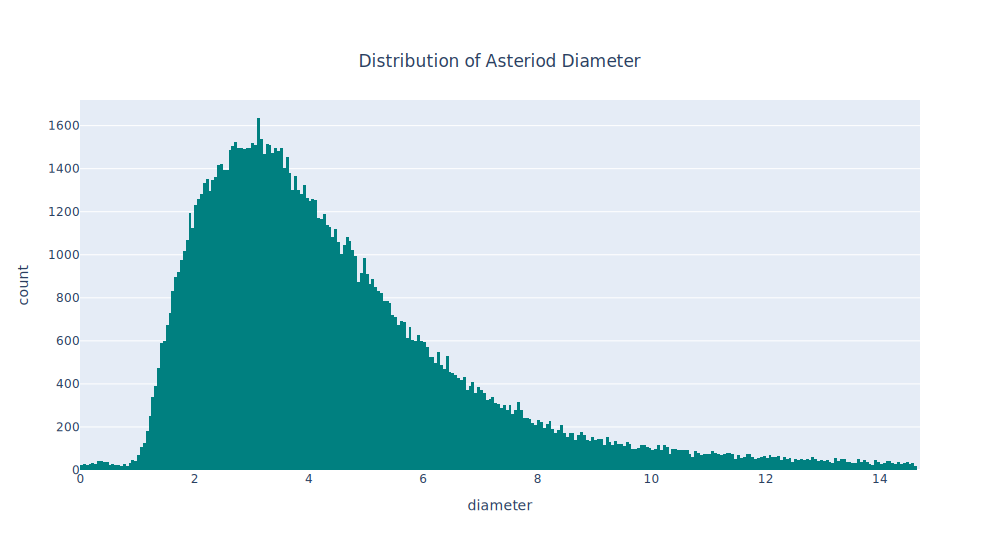

In [30]:
fig = px.histogram(raw_df, x='diameter', title='Distribution of Asteriod Diameter', color_discrete_sequence=plot_color)
custom_show(fig)

<a id="bivariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">5.2. Bivariate Analysis</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

### `semi_major_axis` and `diameter`

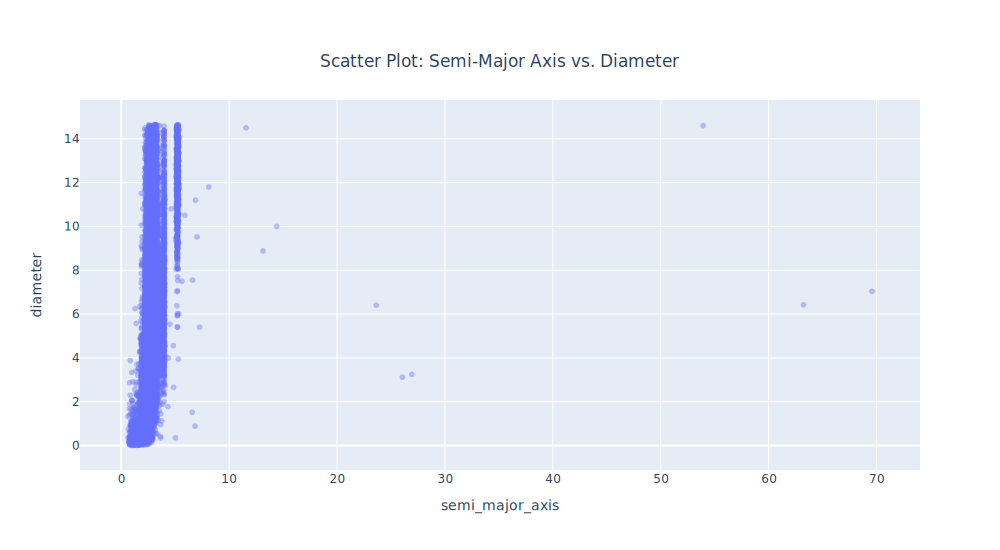

In [31]:
fig = px.scatter(raw_df, x='semi_major_axis', y='diameter', title='Scatter Plot: Semi-Major Axis vs. Diameter', opacity=0.4)
custom_show(fig)

### `earth_minimum_orbit_intersection_distance` and `diameter`

Minimum orbit intersection distance (MOID) is a measure used in astronomy to assess potential close approaches and collision risks between astronomical objects. It is defined as the distance between the closest points of the osculating orbits of two bodies. Earth MOID quantifies the closest approach of the object's orbit to Earth's orbit, providing information about potential close encounters with our planet.

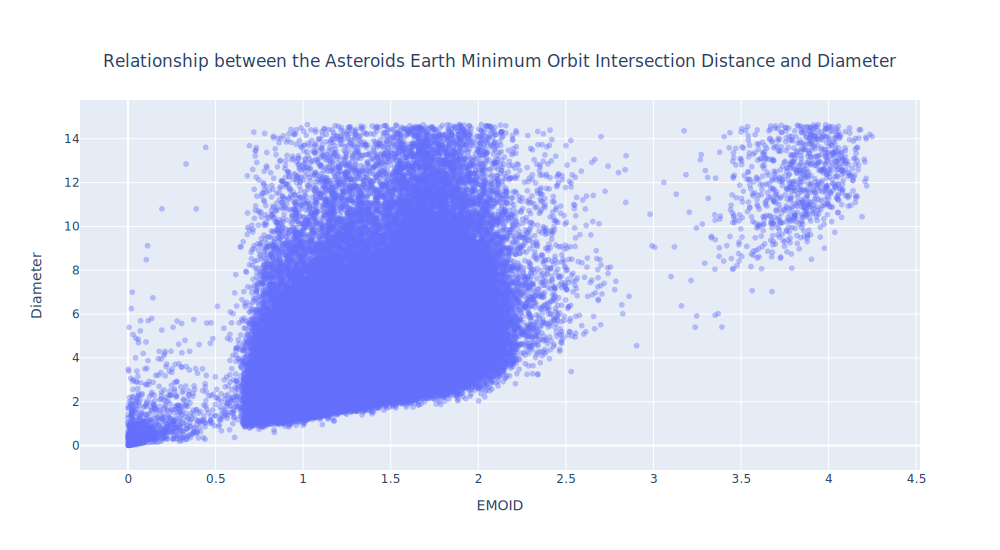

In [81]:
title = 'Relationship between the Asteroids Earth Minimum Orbit Intersection Distance and Diameter'
labels = {'earth_minimum_orbit_intersection_distance': 'EMOID', 'diameter': 'Diameter'}
fig = px.scatter(raw_df, x='earth_minimum_orbit_intersection_distance', y='diameter', title=title, labels=labels, opacity=0.4)
custom_show(fig)

### correlation matrix

In [82]:
corrmat = raw_df[numeric_cols].corr()

In [83]:
# Create a correlation matrix
corr_matrix = raw_df[numeric_cols].corr()

# Create a heatmap
fig = px.imshow(corr_matrix, color_continuous_scale='Viridis', title='Correlation Matrix')

# Customize the layout
fig.update_layout(width=800, height=800, title_x=0.6, title_y=0.9)

# Show the plot
fig.show()

<a id="data_preprocessing"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">6. Data Preparation and Preprocessing</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

<a id="bivariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">6.1. Identify Inputs and Target</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [84]:
input_df = raw_df.drop(columns=['diameter'], axis=1)
target = 'diameter'

<a id="bivariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">6.2. Scale Numeric Columns using MinMaxScaler</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
numeric_cols = input_df.select_dtypes(include=[np.number]).columns
numeric_cols

Index(['semi_major_axis', 'eccentricity', 'inclination_deg',
       'longitude_of_the_ascending_node', 'argument_of_perihelion',
       'perihelion_distance', 'aphelion_distance', 'orbital_period',
       'data_arc_span', 'number_of_observations_used',
       'absolute_magnitude_parameter', 'geometric_albedo', 'rotation_period',
       'earth_minimum_orbit_intersection_distance'],
      dtype='object')

In [87]:
scaler = MinMaxScaler()

In [88]:
input_df[numeric_cols] = scaler.fit_transform(input_df[numeric_cols])

<a id="bivariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">6.3. Encode Categorical Columns</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [89]:
from sklearn.preprocessing import OneHotEncoder

In [90]:
encoder = OneHotEncoder()

In [91]:
input_df.drop(columns=['object_full_name_designation'], axis=1, inplace=True)
categorical_cols = input_df.select_dtypes(exclude=[np.number]).columns.to_list()

In [92]:
encoded_data = encoder.fit_transform(input_df[categorical_cols])

In [93]:
encoded_cols = encoder.get_feature_names_out(input_features=categorical_cols)

In [94]:
encoded_cols

array(['orbit_condition_code_0', 'orbit_condition_code_1',
       'orbit_condition_code_2', 'orbit_condition_code_3',
       'orbit_condition_code_4', 'orbit_condition_code_5',
       'orbit_condition_code_6', 'orbit_condition_code_7',
       'orbit_condition_code_8', 'orbit_condition_code_9',
       'near_earth_object_N', 'near_earth_object_Y',
       'physically_hazardous_asteroid_N',
       'physically_hazardous_asteroid_Y'], dtype=object)

In [95]:
input_df[encoded_cols] = encoded_data.toarray()

<a id="bivariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">6.4. Split Data Into Training and Validation Set</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
input_cols = numeric_cols.tolist() + encoded_cols.tolist()

In [102]:
np.array(input_cols)

array(['semi_major_axis', 'eccentricity', 'inclination_deg',
       'longitude_of_the_ascending_node', 'argument_of_perihelion',
       'perihelion_distance', 'aphelion_distance', 'orbital_period',
       'data_arc_span', 'number_of_observations_used',
       'absolute_magnitude_parameter', 'geometric_albedo',
       'rotation_period', 'earth_minimum_orbit_intersection_distance',
       'orbit_condition_code_0', 'orbit_condition_code_1',
       'orbit_condition_code_2', 'orbit_condition_code_3',
       'orbit_condition_code_4', 'orbit_condition_code_5',
       'orbit_condition_code_6', 'orbit_condition_code_7',
       'orbit_condition_code_8', 'orbit_condition_code_9',
       'near_earth_object_N', 'near_earth_object_Y',
       'physically_hazardous_asteroid_N',
       'physically_hazardous_asteroid_Y'], dtype='<U41')

In [103]:
X = input_df[input_cols]
y = raw_df[target]

In [104]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
X_train

,semi_major_axis,eccentricity,inclination_deg,longitude_of_the_ascending_node,argument_of_perihelion,perihelion_distance,aphelion_distance,orbital_period,data_arc_span,number_of_observations_used,absolute_magnitude_parameter,geometric_albedo,rotation_period,earth_minimum_orbit_intersection_distance,orbit_condition_code_0,orbit_condition_code_1,orbit_condition_code_2,orbit_condition_code_3,orbit_condition_code_4,orbit_condition_code_5,orbit_condition_code_6,orbit_condition_code_7,orbit_condition_code_8,orbit_condition_code_9,near_earth_object_N,near_earth_object_Y,physically_hazardous_asteroid_N,physically_hazardous_asteroid_Y
59000,0.028318,0.225579,0.050295,0.116062,0.882156,0.375276,0.015810,0.006287,0.205488,0.078008,0.245767,0.228228,0.004005,0.240264,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
617625,0.029531,0.188594,0.048594,0.403795,0.967025,0.406472,0.015859,0.006637,0.001708,0.002100,0.374038,0.022022,0.004005,0.280207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
47994,0.034766,0.078614,0.058605,0.449057,0.233705,0.526226,0.016635,0.008211,0.155921,0.213321,0.153412,0.155155,0.004005,0.424226,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
17584,0.025465,0.179326,0.009168,0.822630,0.885030,0.366148,0.013255,0.005486,0.187040,0.150915,0.230375,0.155155,0.004005,0.224271,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
62997,0.037475,0.100223,0.055762,0.225505,0.981280,0.546691,0.018614,0.009064,0.164321,0.161566,0.163674,0.097097,0.004005,0.450208,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376874,0.027739,0.131812,0.060044,0.672673,0.370478,0.413970,0.013752,0.006122,0.129297,0.080108,0.271421,0.294294,0.004005,0.289443,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
485037,0.024004,0.164741,0.034987,0.218069,0.345828,0.356242,0.012145,0.005088,0.064272,0.014101,0.399692,0.031031,0.004005,0.216576,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
306142,0.036876,0.038774,0.085675,0.707516,0.031181,0.576045,0.016889,0.008873,0.127385,0.024302,0.245767,0.073073,0.004005,0.478733,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
709012,0.028384,0.179669,0.057923,0.336717,0.600233,0.398257,0.015004,0.006306,0.078652,0.007951,0.384300,0.099099,0.004005,0.266051,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


<a id="baseline"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">7. Baseline Models</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [107]:
def evaluate_model(model, X_train, y_train, X_val, y_val):
    y_pred = model.predict(X_val) 
    
    MAE = mean_absolute_error(y_val, y_pred)
    
    r2 = model.score(X_val, y_val)
    
    # Number of observations is the shape along axis 0
    n = X_val.shape[0]
    
    # Number of features (predictors, p) is the shape along axis 1
    p = X_val.shape[1]
    
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(mean_squared_error(y_val, y_pred))
    R2 = model.score(X_val, y_val)
    
    return R2, adjusted_r2, RMSE, MAE

In [108]:
def metric_df(model, model_name):
    df = [evaluate_model(model, X_train, y_train, X_val, y_val)]
    model_metrics = pd.DataFrame(data = df, columns=['R2 Score','Adjusted R2 Score','RMSE', 'MAE'])
    model_metrics.insert(0, 'Model', model_name)
    
    return model_metrics

<a id="baseline"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">7.1. Regression Baseline Models</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [109]:
models = [
    (LinearRegression(), 'Linear Regression'),
    (Ridge(), 'Ridge Regression'),
    (ElasticNet(), 'Elastic Net'),
    (KNeighborsRegressor(n_neighbors=3), 'K-Nearest Neighbors'),
    (RandomForestRegressor(n_jobs=-1, max_samples=30000, random_state=42), 'Random Forest Regressor'),
    (LGBMRegressor(verbose=-1), 'LightGBM Regressor'),
    (XGBRegressor(n_jobs=-1, random_state=42, n_estimators=50, max_depth=5, learning_rate=0.2), 'XGBoost Regressor')

]

In [110]:
predictions = []

In [111]:
for model, model_name in models:
    model.fit(X_train, y_train)
    model_metrics = metric_df(model, model_name)
    predictions.append(model_metrics)

In [112]:
predictions_base = pd.concat(predictions, ignore_index=True, sort=False)
predictions_base = predictions_base.sort_values(by=['R2 Score'], ascending=False).style.hide(axis='index')

predictions_base

Model,R2 Score,Adjusted R2 Score,RMSE,MAE
Random Forest Regressor,0.961945,0.961905,0.473486,0.305354
LightGBM Regressor,0.961883,0.961843,0.473868,0.310384
XGBoost Regressor,0.960489,0.960447,0.482460,0.318531
K-Nearest Neighbors,0.861554,0.861408,0.903108,0.623587
Linear Regression,0.830079,0.829900,1.000515,0.713975
Ridge Regression,0.829130,0.828949,1.003305,0.716889
Elastic Net,-0.000093,-0.001148,2.427280,1.824157


Without doing any hyperparameter tuning, we could see a huge model performance just by doing a few data cleaning. I do not 100% trust these values though. Perhaps there are some columns in our training data which provide some think of info in form of data leakage. Since I do not see anything related to this in the research paper, I have just gone with these values. 

In [113]:
rf = RandomForestRegressor(n_jobs=-1, max_samples=30000, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_samples=30000, n_jobs=-1, random_state=42)

In [114]:
rf_metrics = metric_df(rf, 'Random Forest')
rf_metrics

,Model,R2 Score,Adjusted R2 Score,RMSE,MAE
0,Random Forest,0.961945,0.961905,0.473486,0.305354


<a id="optimization"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">8. Optimization: Hyperparameter Tuning</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

Here, I have tried to perform hyperparameter tuning using the random forest only... perhaps we can have a better result

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
rf_grid = {"n_estimators": np.arange(10, 100, 50),
          "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 10, 2),
           "min_samples_leaf": np.arange(1, 10, 2),
           "max_samples": [20000]}

In [117]:
rf_tuned = GridSearchCV(estimator=RandomForestRegressor(),
                        param_grid=rf_grid,
                        cv=5,
                        verbose=True, 
                        n_jobs=-1)

In [118]:
# rf_tuned.fit(X_train, y_train)

In [119]:
# rf_tuned.best_estimator_

In [120]:
# Train Random Forest with the best estimators found

rf_tuned = RandomForestRegressor(n_estimators=...,
                                 min_samples_leaf=...,
                                 min_samples_split=...,
                                 max_features=...,
                                 max_depth=...,
                                 max_samples=...,
                                 n_jobs=-1,
                                 random_state=42
)

# rf_tuned.fit(X_train, y_train)

In [121]:
# rf_tuned_metrics = metric_df(rf_tuned, 'Tunned Random Forest')
# predictions.append(rf_tuned_metrics)

# rf_tuned_metrics

The code cells took forever to run...
I give up

<a id="performance_summary"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">9. Performance Comparison and Summary</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [122]:
predictions_all = pd.concat(predictions, ignore_index=True, sort=False)
predictions_all = predictions_all.sort_values(by=['R2 Score'], ascending=False).style.hide(axis='index')

predictions_all

Model,R2 Score,Adjusted R2 Score,RMSE,MAE
Random Forest Regressor,0.961945,0.961905,0.473486,0.305354
LightGBM Regressor,0.961883,0.961843,0.473868,0.310384
XGBoost Regressor,0.960489,0.960447,0.482460,0.318531
K-Nearest Neighbors,0.861554,0.861408,0.903108,0.623587
Linear Regression,0.830079,0.829900,1.000515,0.713975
Ridge Regression,0.829130,0.828949,1.003305,0.716889
Elastic Net,-0.000093,-0.001148,2.427280,1.824157


<a id="performance_summary"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">9.1. Feature Importance</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [123]:
importance_df = pd.DataFrame({
    'feature': X_val.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

In [124]:
importance_df.head()

,feature,importance
10,absolute_magnitude_parameter,0.621251
11,geometric_albedo,0.269004
0,semi_major_axis,0.043078
7,orbital_period,0.029941
9,number_of_observations_used,0.005068


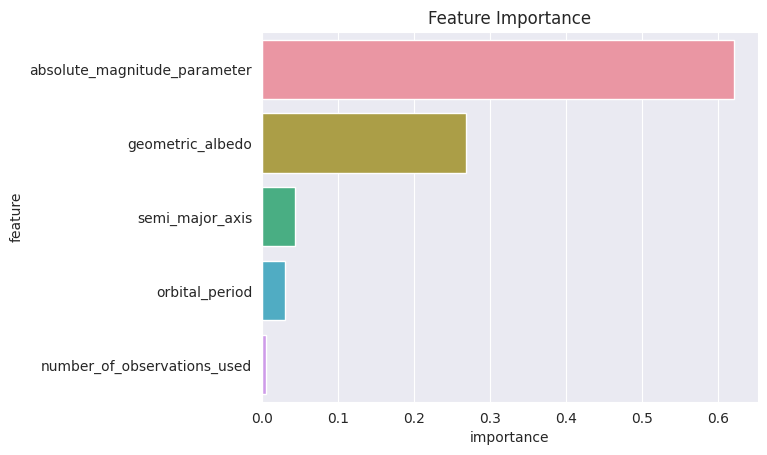

In [125]:

sns.barplot(data=importance_df.head(), x='importance', y='feature')
plt.title('Feature Importance');

<a id="save_model"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">10. Save Model</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

<a id="#"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">10.1. Save Model using Joblib</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [126]:
import joblib

In [128]:
model = {
    'encoder': encoder,
    'scaler': scaler,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols,
    'rf_model': rf
}

In [129]:
joblib.dump(model, 'asteroid_model.joblib')

['asteroid_model.joblib']

<a id="#"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">10.2. Make Prediction on Single Input</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [130]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    
    numeric_cols = model['numeric_cols']
    categorical_cols = model['categorical_cols']
    
    scaler = model['scaler']
    encoder = model['encoder']
    
    rf_model = model['rf_model']
    
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    
    encoded_data = encoder.transform(input_df[categorical_cols])
    
    input_df[encoded_cols] = encoded_data.toarray()
    
    input_cols = numeric_cols.tolist() + encoded_cols.tolist()
    
    X_input = input_df[input_cols]
    
    pred = rf_model.predict(X_input)
    
    return pred

In [131]:
test_cols = x = [
    'semi_major_axis', 'eccentricity', 'inclination_deg', 'longitude_of_the_ascending_node',
    'argument_of_perihelion', 'perihelion_distance', 'aphelion_distance', 'orbital_period',
    'data_arc_span', 'number_of_observations_used', 'absolute_magnitude_parameter',
    'geometric_albedo', 'rotation_period', 'earth_minimum_orbit_intersection_distance',
    'orbit_condition_code', 'near_earth_object', 'physically_hazardous_asteroid', 'diameter'
] 

In [132]:
# Get the raw data for the first row in our validation data
raw_df[x].loc[X_val.index[0]].to_dict()

{'semi_major_axis': 2.605483922357132,
 'eccentricity': 0.2026129018639087,
 'inclination_deg': 17.58251286671824,
 'longitude_of_the_ascending_node': 122.0547639572009,
 'argument_of_perihelion': 306.8301267762464,
 'perihelion_distance': 2.077579264088595,
 'aphelion_distance': 3.133388580625669,
 'orbital_period': 4.20572428962057,
 'data_arc_span': 8983.0,
 'number_of_observations_used': 1155,
 'absolute_magnitude_parameter': 13.6,
 'geometric_albedo': 0.347,
 'rotation_period': 7.56,
 'earth_minimum_orbit_intersection_distance': 1.13771,
 'orbit_condition_code': '0',
 'near_earth_object': 'N',
 'physically_hazardous_asteroid': 'N',
 'diameter': 5.666}

In [133]:
# Get features only for the first row in our validation data
single_input = raw_df[x].loc[X_val.index[0]][:-1].to_dict()

single_input

{'semi_major_axis': 2.605483922357132,
 'eccentricity': 0.2026129018639087,
 'inclination_deg': 17.58251286671824,
 'longitude_of_the_ascending_node': 122.0547639572009,
 'argument_of_perihelion': 306.8301267762464,
 'perihelion_distance': 2.077579264088595,
 'aphelion_distance': 3.133388580625669,
 'orbital_period': 4.20572428962057,
 'data_arc_span': 8983.0,
 'number_of_observations_used': 1155,
 'absolute_magnitude_parameter': 13.6,
 'geometric_albedo': 0.347,
 'rotation_period': 7.56,
 'earth_minimum_orbit_intersection_distance': 1.13771,
 'orbit_condition_code': '0',
 'near_earth_object': 'N',
 'physically_hazardous_asteroid': 'N'}

In [134]:
predict_input(single_input)

array([4.78908])

Here, our model predicted 4.78908 while the true diameter is 5.666

If you find this notebook useful, kindly upvote 👍